In [39]:
library(limma)
library(Biobase)
library(dplyr)
library(ggplot2)
library(magrittr)
library(ggrepel)

Expression Set object

In [874]:
data <- read.csv("exp/final_TCGA_tnbc.csv", header=TRUE)

#data <- read.csv("exp/final_TCGA_luma.csv", header=TRUE)

In [875]:
# TNBC
data <- data[,c(-2,-1)]
data = t(data)

# ## lumA
# data <- data[,c(-2,-1)]
# data = t(data)


#names(data) <- data[1,]
#data <- data[-1,]

In [900]:
data


EGFR,0.6056965,1.083803,1.258925,0.9694766,0.9416169,0.6668205,-0.7573095,0.6574641,0.5072143,0.2396759,...,1.675649,0.9842455,0.04887921,1.818765,0.1682197,0.4325475,1.092403,1.820871,-0.22572821,0.7237019
CA9,-1.5888000,-1.668000,0.093400,-0.1731600,-1.1957000,-1.0551000,-0.5063000,-0.8766000,-1.6098000,-1.0951200,...,0.524500,-0.1157000,-0.83610000,-1.147680,-1.2478000,0.2271000,-0.764400,-0.222400,-0.70092000,-1.4890000
CDH1,-0.2719000,-0.586600,-0.887500,-0.8089000,-0.3299000,-0.6829000,-0.1235000,0.2859000,-2.8044000,-0.4639000,...,-0.434800,-1.4251000,-0.27530000,0.512500,-0.0738000,0.1191000,0.455100,-0.286900,-0.56170000,-0.8526000
ESR1,-2.3053000,-1.981100,-1.114300,-2.7064000,-1.8424000,-2.1182000,-0.9068000,-1.9139000,-1.5946000,-2.4180000,...,-1.528300,-2.1762000,-1.59690000,-1.810500,-1.4161000,-1.2654000,0.165800,-1.750300,-1.60950000,-1.2246000
CASP3,-1.5089000,-1.421200,-1.275500,-4.9167000,-1.0071000,-3.4536000,-1.5443000,-2.8578000,-0.5365000,-3.6398000,...,-1.285700,-1.9264000,-1.63530000,-1.453000,-1.4673000,-3.6080000,-0.073300,-1.671700,-1.97040000,-1.3677000
H3F3B,0.3785000,0.464100,1.178500,0.0335000,0.9964000,1.0429000,-0.8634000,-0.3066000,-1.3521000,0.5515000,...,0.564100,0.0921000,-0.61470000,-0.336400,0.0070000,0.7596000,-0.315000,0.118500,-1.49430000,0.1935000
MKI67,0.1999000,0.944600,1.231900,1.9078000,0.4611000,2.1174000,1.3282000,1.2067000,1.5159000,2.2185000,...,1.124000,0.1764000,0.31170000,1.001500,-0.6085000,0.7175000,-0.150900,2.160200,0.49600000,0.5499000
ACTA2,-0.5965000,1.385500,-0.132300,-1.3981000,0.2377000,-1.4977000,-0.9947000,1.7297000,0.4674000,-2.5773000,...,-1.393200,-0.5213000,0.78750000,-0.177600,0.5459000,-1.2381000,-0.097700,-1.147100,1.86870000,0.6888000
VIM,1.4183000,2.292700,-0.068400,-2.1162000,0.7997000,-0.1417000,-0.6120000,1.3798000,0.2752000,0.7394000,...,-0.703800,-0.8727000,1.25120000,-0.538200,1.2349000,0.2495000,1.752400,0.502900,0.76790000,1.4530000
TP53,-3.0017000,-0.260100,-0.409300,-0.1851000,0.3405000,0.7547000,1.4599000,-0.9206000,-0.8520000,-1.6554000,...,-1.272200,-2.2791000,1.66800000,-0.636100,0.9531000,-0.4372000,-1.531100,0.047600,0.08960000,0.6667000
ERBB2,0.0710000,-0.439100,-0.766900,-3.1706000,-1.5504000,-0.7951000,-0.9949000,0.2378000,-0.1993000,0.1589000,...,-1.337400,-0.5307000,-0.69370000,-0.435700,0.7156000,-0.5673000,-0.402400,-0.647700,-0.84130000,-1.4453000


In [877]:
## tnbc good


data_subset_1 = as.matrix(data[,c(4, 10, 11, 12, 15, 25, 34, 39, 46, 47, 52, 56, 59, 71, 73, 80, 81, 94, 96, 110, 116, 117, 122, 125, 130, 132, 136, 153, 158)])
data_subset_2 = as.matrix(data[,c(1, 2, 3, 5, 6, 7, 8, 9, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 53, 54, 55, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 118, 119, 120, 121, 123, 124, 126, 127, 128, 129, 131, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 159)])
# ##

In [878]:
# #####lumA bad ----finalized


# data_subset_1 = as.matrix(data[,c(2, 4, 7, 20, 34, 37, 42, 47, 56, 57, 58, 64, 66, 67, 72, 80, 88, 92, 100, 104, 106, 136, 164, 169, 171, 172, 216, 221, 231, 242, 243, 244, 257, 262, 271, 272, 273, 287, 291, 293, 302, 303, 309, 312, 318, 319, 325, 330, 333, 345, 359, 364, 372, 392, 393, 398, 431, 432, 433, 485, 489, 491, 508, 511, 519, 531, 539, 551, 555, 559, 570, 571, 583)])
# data_subset_2 = as.matrix(data[,c(1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 59, 60, 61, 62, 63, 65, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 170, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 258, 259, 260, 261, 263, 264, 265, 266, 267, 268, 269, 270, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 288, 289, 290, 292, 294, 295, 296, 297, 298, 299, 300, 301, 304, 305, 306, 307, 308, 310, 311, 313, 314, 315, 316, 317, 320, 321, 322, 323, 324, 326, 327, 328, 329, 331, 332, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 394, 395, 396, 397, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 486, 487, 488, 490, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 509, 510, 512, 513, 514, 515, 516, 517, 518, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 532, 533, 534, 535, 536, 537, 538, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 552, 553, 554, 556, 557, 558, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599)])

# #

In [879]:
# ### clus7 ----- finalized
# data_subset_1 = as.matrix(data[,c(48, 49, 87, 106, 112, 122, 133, 149, 159, 166, 264, 284, 309, 314, 364, 389, 406, 407, 479, 480, 507, 512, 514, 577, 598, 640, 717, 722, 728, 757, 765, 805, 873, 882, 940, 945, 957, 986, 1013, 1015, 1050, 1072)])
# data_subset_2 = as.matrix(data[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 310, 311, 312, 313, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 508, 509, 510, 511, 513, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 718, 719, 720, 721, 723, 724, 725, 726, 727, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 758, 759, 760, 761, 762, 763, 764, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 874, 875, 876, 877, 878, 879, 880, 881, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 941, 942, 943, 944, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1014, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093)])

In [880]:
### clus6



# #### clus6 lumA

# data_subset_1 = as.matrix(data[,c(6, 10, 11, 28, 48, 63, 67, 76, 79, 81, 95, 96, 107, 118, 122, 138, 166, 173, 221, 225, 241, 243, 264, 290, 365, 388, 389, 394, 430, 431, 435, 452, 484, 494, 514, 527, 528, 533, 538, 555, 563, 577, 582, 590, 592, 598, 599, 610, 614, 625, 656, 715, 735, 760, 764, 779, 780, 781, 801, 822, 824, 856, 860, 882, 889, 917, 940, 944, 945, 948, 952, 958, 973, 974, 986, 988, 1042)])
# data_subset_2 = as.matrix(data[,c(1, 2, 3, 4, 5, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 390, 391, 392, 393, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 432, 433, 434, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 485, 486, 487, 488, 489, 490, 491, 492, 493, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 529, 530, 531, 532, 534, 535, 536, 537, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 556, 557, 558, 559, 560, 561, 562, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 578, 579, 580, 581, 583, 584, 585, 586, 587, 588, 589, 591, 593, 594, 595, 596, 597, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 611, 612, 613, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 761, 762, 763, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 823, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 857, 858, 859, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 883, 884, 885, 886, 887, 888, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 941, 942, 943, 946, 947, 949, 950, 951, 953, 954, 955, 956, 957, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 987, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093)])



In [881]:
# # ## TNBC-good --finalized




# data_subset_1 = as.matrix(data[,c(5, 6, 10, 11, 15, 16, 25, 26, 63, 67, 76, 79, 81, 89, 94, 95, 96, 103, 107, 118, 123, 138, 141, 150, 181, 193, 218, 221, 225, 236, 242, 243, 254, 258, 277, 290, 296, 301, 326, 344, 353, 361, 369, 382, 388, 398, 400, 411, 415, 430, 431, 435, 437, 442, 445, 448, 452, 454, 455, 459, 471, 494, 499, 518, 519, 525, 527, 528, 533, 534, 538, 543, 544, 551, 555, 558, 559, 563, 565, 568, 576, 579, 582, 586, 587, 589, 590, 599, 605, 607, 610, 614, 636, 642, 651, 656, 657, 673, 679, 702, 712, 715, 716, 723, 731, 735, 749, 760, 761, 764, 771, 779, 780, 781, 789, 801, 803, 817, 856, 860, 862, 903, 917, 919, 920, 933, 936, 948, 952, 971, 973, 974, 979, 988, 1003, 1009, 1032, 1035, 1042, 1043, 1047, 1049, 1064, 1068, 1074, 1075)])
# data_subset_2 = as.matrix(data[,c(1, 2, 3, 4, 7, 8, 9, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 97, 98, 99, 100, 101, 102, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 257, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 291, 292, 293, 294, 295, 297, 298, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 345, 346, 347, 348, 349, 350, 351, 352, 354, 355, 356, 357, 358, 359, 360, 362, 363, 364, 365, 366, 367, 368, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 383, 384, 385, 386, 387, 389, 390, 391, 392, 393, 394, 395, 396, 397, 399, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 412, 413, 414, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 432, 433, 434, 436, 438, 439, 440, 441, 443, 444, 446, 447, 449, 450, 451, 453, 456, 457, 458, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 495, 496, 497, 498, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 520, 521, 522, 523, 524, 526, 529, 530, 531, 532, 535, 536, 537, 539, 540, 541, 542, 545, 546, 547, 548, 549, 550, 552, 553, 554, 556, 557, 560, 561, 562, 564, 566, 567, 569, 570, 571, 572, 573, 574, 575, 577, 578, 580, 581, 583, 584, 585, 588, 591, 592, 593, 594, 595, 596, 597, 598, 600, 601, 602, 603, 604, 606, 608, 609, 611, 612, 613, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 637, 638, 639, 640, 641, 643, 644, 645, 646, 647, 648, 649, 650, 652, 653, 654, 655, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 674, 675, 676, 677, 678, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 703, 704, 705, 706, 707, 708, 709, 710, 711, 713, 714, 717, 718, 719, 720, 721, 722, 724, 725, 726, 727, 728, 729, 730, 732, 733, 734, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 762, 763, 765, 766, 767, 768, 769, 770, 772, 773, 774, 775, 776, 777, 778, 782, 783, 784, 785, 786, 787, 788, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 802, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 857, 858, 859, 861, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 918, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 934, 935, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 949, 950, 951, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 972, 975, 976, 977, 978, 980, 981, 982, 983, 984, 985, 986, 987, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1004, 1005, 1006, 1007, 1008, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1033, 1034, 1036, 1037, 1038, 1039, 1040, 1041, 1044, 1045, 1046, 1048, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1065, 1066, 1067, 1069, 1070, 1071, 1072, 1073, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093)])

In [882]:
data_subset_3 = cbind(data_subset_1,data_subset_2)

In [883]:
dataset <- ExpressionSet(assayData=as.matrix(data_subset_3))
#dataset <- ExpressionSet(assayData=as.matrix(data_subset_1))

In [884]:
yes = dim(data_subset_1)[2]
no  = dim(data_subset_2)[2]
design = cbind(c(c(rep(1, yes)),c(rep(0, no))),c(c(rep(0, yes)),c(rep(1, no))))
colnames(design) <- c("match","notmatch")

In [902]:
#design

In [885]:
# design

In [886]:
#fit <- lmFit(data_subset_3, design)
fit <- lmFit(data_subset_3, design)

In [887]:
#design

In [888]:
cont.matrix <- makeContrasts(contrasts = "match-notmatch", levels=design)

In [889]:
fit2 <- contrasts.fit(fit, cont.matrix)

In [890]:
fit2 <- eBayes(fit2, trend=FALSE)

In [891]:
results <- decideTests(fit2)

In [892]:
topGenes =topTable(fit2)

In [893]:

limma_result_fit <- topTable(fit2,  coef=1, n=dim(fit2)[1])

In [894]:
limma_result_fit

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KRT5,0.35908460,0.35341226,3.6029141,0.0004154937,0.008454486,-0.1973096
CA9,-0.73336411,-0.78072516,-3.4969372,0.0006038919,0.008454486,-0.5350862
GATA3,0.94470828,-0.01685472,3.0989347,0.0022815595,0.021294555,-1.7252953
CD3E,-0.45142488,0.36995849,-2.2018497,0.0290546089,0.203382262,-3.9290792
MS4A1,-0.44545849,0.30121824,-2.0308200,0.0438684812,0.245663495,-4.2701469
KRT8,-0.26132804,0.58515409,-1.7258324,0.0862379140,0.375687445,-4.8130432
EGFR,0.28371952,0.98929153,1.6847173,0.0939218613,0.375687445,-4.8797499
TP53,-0.37451016,0.19924465,-1.6160251,0.1079873959,0.377955886,-4.9877324
PTPRC,-0.33565507,0.32345220,-1.4741371,0.1423381465,0.423540742,-5.1969748


In [895]:
limma_result_fit$gene_symbol <- row.names(limma_result_fit)

In [896]:
# ##### visualization

In [897]:
#volcanoplot(fit2,highlight=2,names=row.names(data_subset_3),xlim=c(-2,2),ylim=c(-0.1,10), main="TCGA DE")

In [898]:
# limma_result_fit$diffexpressed <- "NO"
# # if log2Foldchange > 0.6 and pvalue < 0.05, set as "UP" 
# limma_result_fit$diffexpressed[limma_result_fit$logFC > 0.6 & limma_result_fit$adj.P.Val < 0.05] <- "UP"
# # if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
# limma_result_fit$diffexpressed[limma_result_fit$logFC < -0.6 & limma_result_fit$adj.P.Val < 0.05] <- "DOWN"

Warning message:
"Removed 26 rows containing missing values (geom_text_repel)."


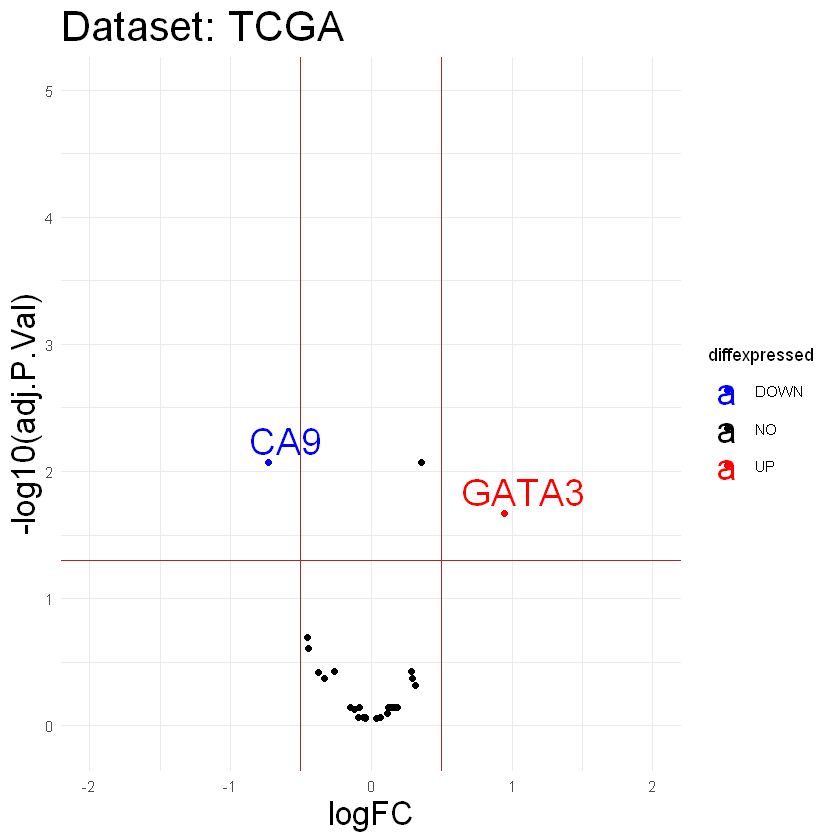

In [899]:
limma_result_fit$diffexpressed <- "NO"
# if log2Foldchange > 0.5 and pvalue < 0.05, set as "UP" 
limma_result_fit$diffexpressed[limma_result_fit$logFC > 0.5 & limma_result_fit$adj.P.Val < 0.05] <- "UP"
# if log2Foldchange < -0.5 and pvalue < 0.05, set as "DOWN"
limma_result_fit$diffexpressed[limma_result_fit$logFC < -0.5 & limma_result_fit$adj.P.Val < 0.05] <- "DOWN"

p <- ggplot(data=limma_result_fit, aes(x=logFC, y=-log10(P.Value), label=row.names(data_subset_3),col=diffexpressed)) + geom_point(size = 2, alpha = 0.8) + theme_minimal() + geom_text_repel()
p2 <- p + geom_vline(xintercept=c(-0.6, 0.6), col="red") + geom_hline(yintercept=-log10(0.05), col="red")
p3 <- p2 + scale_color_manual(values=c("blue", "black", "red"))
mycolors <- c("blue", "red", "black")
names(mycolors) <- c("DOWN", "UP", "NO")
p3 <- p2 + scale_colour_manual(values = mycolors)

limma_result_fit$delabel <- NA
limma_result_fit$delabel[limma_result_fit$diffexpressed != "NO"] <- limma_result_fit$gene_symbol[limma_result_fit$diffexpressed != "NO"]

ggplot(data=limma_result_fit, aes(x=logFC, y=-log10(adj.P.Val), label=delabel,col=diffexpressed)) +
        geom_point() + 
        theme_minimal() +
        geom_text_repel(size=8,max.overlaps =20 ) +
        scale_color_manual(values=c("blue", "black", "red")) +
        geom_vline(xintercept=c(-0.5, 0.5), col="brown") +
        geom_hline(yintercept=-log10(0.05), col="brown") + xlim(-2, 2) +ylim(-0.1,5) + ggtitle("Dataset: TCGA") +theme(axis.title = element_text(size = 20))  + theme(plot.title = element_text(size = 25))

In [805]:
# p <- ggplot(data=limma_result_fit, aes(x=logFC, y=-log10(P.Value), label=row.names(data_subset_3),col=diffexpressed)) + geom_point(size = 2, alpha = 0.8) + theme_minimal() + geom_text_repel()


In [617]:
# p2 <- p + geom_vline(xintercept=c(-0.6, 0.6), col="red") +
#         geom_hline(yintercept=-log10(0.05), col="red")

In [1029]:
# p3 <- p2 + scale_color_manual(values=c("blue", "black", "red"))

In [1030]:
# mycolors <- c("blue", "red", "black")
# names(mycolors) <- c("DOWN", "UP", "NO")
# p3 <- p2 + scale_colour_manual(values = mycolors)

In [1031]:
# limma_result_fit$delabel <- NA
# limma_result_fit$delabel[limma_result_fit$diffexpressed != "NO"] <- limma_result_fit$gene_symbol[limma_result_fit$diffexpressed != "NO"]

In [1032]:
# ggplot(data=limma_result_fit, aes(x=logFC, y=-log10(P.Value), label=row.names(data_subset_3),col=diffexpressed)) +
#         geom_point() + 
#         theme_minimal() +
#         geom_text_repel() +
#         scale_color_manual(values=c("blue", "black", "red")) +
#         geom_vline(xintercept=c(-0.6, 0.6), col="red") +
#         geom_hline(yintercept=-log10(0.05), col="red")

In [1033]:
#volcanoplot(fit2,highlight=15,names=row.names(limma_result_fit))

In [1034]:
row.names(limma_result_fit)

[1] "CA9"   "GATA3" "CD68"  "KRT5"  "MKI67" "PTPRC" "CD3E"  "MS4A1" "ACTA2"
[10] "SNAI2" "CASP3" "VIM"   "CDH1"  "TP53"  "PGR"   "H3F3B" "KRT7"  "KRT8" 
[19] "MYC"   "ERBB2" "CD44"  "KRT19" "KRT14" "FN1"   "VWF"   "RPS6"

In [104]:
vennCounts(results)

  match7-notmatch7 Counts
1                0     16
2                1     12
attr(,"class")
[1] "VennCounts"

In [ ]:
6, 10, 11, 28, 48, 63, 67, 76, 79, 81, 95, 96, 107, 118, 122, 138, 166, 173, 221, 225, 241, 243, 264, 290, 365, 388, 389, 394, 430, 431, 435, 452, 484, 494, 514, 527, 528, 533, 538, 555, 563, 577, 582, 590, 592, 598, 599, 610, 614, 625, 656, 715, 735, 760, 764, 779, 780, 781, 801, 822, 824, 856, 860, 882, 889, 917, 940, 944, 945, 948, 952, 958, 973, 974, 986, 988, 1042, 1, 2, 3, 4, 5, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 390, 391, 392, 393, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 432, 433, 434, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 485, 486, 487, 488, 489, 490, 491, 492, 493, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 529, 530, 531, 532, 534, 535, 536, 537, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 556, 557, 558, 559, 560, 561, 562, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 578, 579, 580, 581, 583, 584, 585, 586, 587, 588, 589, 591, 593, 594, 595, 596, 597, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 611, 612, 613, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 761, 762, 763, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 823, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 857, 858, 859, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 883, 884, 885, 886, 887, 888, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 941, 942, 943, 946, 947, 949, 950, 951, 953, 954, 955, 956, 957, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 987, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093

